In [89]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from joblib import dump, load
import joblib

## 0. DataFrame

In [90]:
football_df = pd.read_csv('data/all_data_with_elo.csv', low_memory = False)
football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO
0,0,D1,2003/8/1,Bayern Munich,Ein Frankfurt,3,1,H,17.0,6.0,NaN,NaN,1.200,5.000,11.000,1.25,4.5,9.0,1.25,4.5,10.00,NaN,NaN,NaN,NaN,NaN,NaN,1859.379272,1593.249268
1,1,F1,2003/8/1,Lille,Lyon,1,0,H,NaN,NaN,NaN,NaN,2.875,3.000,2.250,2.70,2.9,2.4,3.00,3.0,2.20,NaN,NaN,NaN,NaN,NaN,NaN,1612.968018,1726.539795
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860
38378,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066
38379,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586
38380,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232


## 1. Descriptive Statistics 

**1.1 DataFrame Shape**

In [91]:
# no. rows and no. cols
football_df.shape

(38382, 29)

In [92]:
# feature names
print(football_df.columns.tolist())

['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'AHCh', 'B365CAHH', 'B365CAHA', 'HomeTeamELO', 'AwayTeamELO']


**1.2 NaN Values**

In [93]:
football_df.isnull().sum()

Unnamed: 0         0
Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
FTR                0
HS              1762
AS              1762
HST             2568
AST             2568
B365H             49
B365D             49
B365A             49
IWH             1925
IWD             1925
IWA             1925
WHH              573
WHD              573
WHA              573
AHh              262
B365AHH          276
B365AHA          276
AHCh           28479
B365CAHH       28481
B365CAHA       28481
HomeTeamELO      125
AwayTeamELO      126
dtype: int64

In [94]:
# total elements in 
football_df.size

1113078

In [95]:
# total number of NaN
football_df.size - football_df.count().sum()

102807

In [96]:
# total number of NaN rows
football_df.isnull().any(axis = 1).sum()

30335

In [97]:
# total number of NaN columns
football_df.isnull().any(axis = 0).sum()

21

## 2. Data Wrangling and Feature Transformation/Development

### 2.1 NaN Handling

`TODO`: drop NaN values along columns: {Date, Home Team, Away Team, FTR} <br>
`TODO`: identify betting odds w/ most available data

In [98]:
# 当前方法仅提取这几个字段 分区 日期 主队 客队 full-time-result 三家机构的胜平负 主队ELO评分 客队ELO评分
# nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 
#             'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']
nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']

In [99]:
nan_football_df = football_df.dropna(subset = nan_mask)
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298
5,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972
7,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860
38378,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066
38379,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586
38380,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232


In [100]:
nan_football_df['asia_final_result'] = nan_football_df['FTHG'] - nan_football_df['FTAG'] + nan_football_df['AHh']
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO,asia_final_result
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045,-1.75
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732,-1.00
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298,-3.75
5,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972,-3.75
7,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860,0.00
38378,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066,1.00
38379,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586,1.25
38380,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232,-2.25


In [101]:
nan_football_df_noNone = nan_football_df.dropna(subset = nan_mask)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO,asia_final_result
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045,-1.75
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732,-1.00
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298,-3.75
5,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972,-3.75
7,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860,0.00
38378,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066,1.00
38379,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586,1.25
38380,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232,-2.25


In [102]:
nan_football_df_noNone.reset_index(inplace=True, drop=True)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO,asia_final_result
0,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045,-1.75
1,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732,-1.00
2,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298,-3.75
3,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972,-3.75
4,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860,0.00
37291,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066,1.00
37292,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586,1.25
37293,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232,-2.25


In [103]:
conditions = [
    nan_football_df_noNone['asia_final_result'] < -0.25,
    nan_football_df_noNone['asia_final_result'] == -0.25,
    nan_football_df_noNone['asia_final_result'] == 0,
    nan_football_df_noNone['asia_final_result'] == 0.25,
    nan_football_df_noNone['asia_final_result'] > 0.25,
]
easy_conditions = [
    nan_football_df_noNone['asia_final_result'] <= -0.25,
    nan_football_df_noNone['asia_final_result'] == 0,
    nan_football_df_noNone['asia_final_result'] >= 0.25,
]
labels = [-2, -1, 0, 1, 2]
easy_labels = [-1, 0, 1]

nan_football_df_noNone['label'] = np.select(conditions, labels)
nan_football_df_noNone['easy_label'] = np.select(easy_conditions, easy_labels)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO,asia_final_result,label,easy_label
0,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045,-1.75,-2,-1
1,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732,-1.00,-2,-1
2,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298,-3.75,-2,-1
3,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972,-3.75,-2,-1
4,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130,-0.75,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860,0.00,0,0
37291,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066,1.00,2,1
37292,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586,1.25,2,1
37293,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232,-2.25,-2,-1


In [104]:
nan_football_df_noNone['label'].mean()

0.017026411047057245

In [105]:
nan_football_df_noNone['easy_label'].mean()

-0.00024131921169057516

In [106]:
# resize shape
football_df.shape[0] - nan_football_df_noNone.shape[0]

1087

### 2.2 Feature Encoding <br>
* $\phi(Date)$ $\Rightarrow$ one column for *year*, second column for *month*, third column for *day of year*
* One hot encode Division, Home and Away Teams
* Label encode Full Time Result (Win/Draw/Loss)

In [107]:
feats = nan_mask
feats.append('easy_label')

In [108]:
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,HomeTeamELO,AwayTeamELO,asia_final_result,label,easy_label
0,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,NaN,NaN,1.727,3.100,4.500,1.70,3.1,4.4,1.66,3.1,5.00,-0.75,2.050,1.850,NaN,NaN,NaN,1702.604858,1611.196045,-1.75,-2,-1
1,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,NaN,NaN,2.500,2.875,2.625,2.70,2.9,2.4,2.60,3.1,2.40,0.00,1.925,1.975,NaN,NaN,NaN,1685.016113,1665.625732,-1.00,-2,-1
2,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,NaN,NaN,1.571,3.500,5.000,1.65,3.3,4.4,1.57,3.5,5.00,-0.75,1.800,2.100,NaN,NaN,NaN,1718.566284,1649.805298,-3.75,-2,-1
3,5,D1,2003/8/2,Hertha,Werder Bremen,0,3,A,23.0,19.0,NaN,NaN,1.833,3.200,3.750,1.80,3.1,3.8,1.72,3.4,4.00,-0.75,2.025,1.875,NaN,NaN,NaN,1719.916748,1692.120972,-3.75,-2,-1
4,7,F1,2003/8/2,Lens,Le Mans,0,0,D,NaN,NaN,NaN,NaN,1.571,3.250,5.500,1.60,3.3,4.8,1.66,3.3,4.50,-0.75,1.900,2.000,NaN,NaN,NaN,1697.354004,1539.958130,-0.75,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,38377,F1,2025/1/19,St Etienne,Nantes,1,1,D,12.0,8.0,2.0,4.0,2.450,3.250,2.900,NaN,NaN,NaN,2.50,3.1,2.88,0.00,1.810,2.090,0.25,1.73,2.08,1518.982300,1559.531860,0.00,0,0
37291,38378,D1,2025/1/19,Union Berlin,Mainz,2,1,H,12.0,9.0,4.0,1.0,2.550,3.200,2.880,NaN,NaN,NaN,2.60,3.1,2.88,0.00,1.840,2.060,0.00,2.00,1.93,1590.621826,1710.893066,1.00,2,1
37292,38379,SP1,2025/1/19,Valencia,Sociedad,1,0,H,7.0,9.0,2.0,3.0,3.100,3.000,2.550,NaN,NaN,NaN,3.20,3.0,2.45,0.25,1.730,2.080,0.00,2.13,1.78,1613.392090,1742.600586,1.25,2,1
37293,38380,I1,2025/1/19,Verona,Lazio,0,3,A,16.0,14.0,3.0,5.0,5.000,3.500,1.750,NaN,NaN,NaN,4.50,3.6,1.75,0.75,1.870,2.030,0.75,1.87,2.06,1620.682861,1810.438232,-2.25,-2,-1


In [109]:
learning_df_feat = nan_football_df_noNone.copy()[feats]
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label
0,F1,2003/8/2,Auxerre,Nice,1,2,1.727,3.100,4.500,1.66,3.1,5.00,-0.75,2.050,1.850,1702.604858,1611.196045,-1
1,F1,2003/8/2,Guingamp,Marseille,0,1,2.500,2.875,2.625,2.60,3.1,2.40,0.00,1.925,1.975,1685.016113,1665.625732,-1
2,D1,2003/8/2,Hamburg,Hannover,0,3,1.571,3.500,5.000,1.57,3.5,5.00,-0.75,1.800,2.100,1718.566284,1649.805298,-1
3,D1,2003/8/2,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,1.72,3.4,4.00,-0.75,2.025,1.875,1719.916748,1692.120972,-1
4,F1,2003/8/2,Lens,Le Mans,0,0,1.571,3.250,5.500,1.66,3.3,4.50,-0.75,1.900,2.000,1697.354004,1539.958130,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,F1,2025/1/19,St Etienne,Nantes,1,1,2.450,3.250,2.900,2.50,3.1,2.88,0.00,1.810,2.090,1518.982300,1559.531860,0
37291,D1,2025/1/19,Union Berlin,Mainz,2,1,2.550,3.200,2.880,2.60,3.1,2.88,0.00,1.840,2.060,1590.621826,1710.893066,1
37292,SP1,2025/1/19,Valencia,Sociedad,1,0,3.100,3.000,2.550,3.20,3.0,2.45,0.25,1.730,2.080,1613.392090,1742.600586,1
37293,I1,2025/1/19,Verona,Lazio,0,3,5.000,3.500,1.750,4.50,3.6,1.75,0.75,1.870,2.030,1620.682861,1810.438232,-1


In [201]:
learning_df_feat.reset_index(inplace=True, drop=True)
# 保存文件作为历史文件
learning_df_feat.to_csv('.\prediction_data/history_data.csv', index=False, encoding='utf-8-sig')
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label
0,F1,2003/8/2,Auxerre,Nice,1,2,1.727,3.100,4.500,1.66,3.1,5.00,-0.75,2.050,1.850,1702.604858,1611.196045,-1
1,F1,2003/8/2,Guingamp,Marseille,0,1,2.500,2.875,2.625,2.60,3.1,2.40,0.00,1.925,1.975,1685.016113,1665.625732,-1
2,D1,2003/8/2,Hamburg,Hannover,0,3,1.571,3.500,5.000,1.57,3.5,5.00,-0.75,1.800,2.100,1718.566284,1649.805298,-1
3,D1,2003/8/2,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,1.72,3.4,4.00,-0.75,2.025,1.875,1719.916748,1692.120972,-1
4,F1,2003/8/2,Lens,Le Mans,0,0,1.571,3.250,5.500,1.66,3.3,4.50,-0.75,1.900,2.000,1697.354004,1539.958130,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,F1,2025/1/19,St Etienne,Nantes,1,1,2.450,3.250,2.900,2.50,3.1,2.88,0.00,1.810,2.090,1518.982300,1559.531860,0
37291,D1,2025/1/19,Union Berlin,Mainz,2,1,2.550,3.200,2.880,2.60,3.1,2.88,0.00,1.840,2.060,1590.621826,1710.893066,1
37292,SP1,2025/1/19,Valencia,Sociedad,1,0,3.100,3.000,2.550,3.20,3.0,2.45,0.25,1.730,2.080,1613.392090,1742.600586,1
37293,I1,2025/1/19,Verona,Lazio,0,3,5.000,3.500,1.750,4.50,3.6,1.75,0.75,1.870,2.030,1620.682861,1810.438232,-1


**2.2.1 Division and Home/Away Team Encoding**

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

div_encoder = OneHotEncoder()
home_encoder = OneHotEncoder()
away_encoder = OneHotEncoder()

In [112]:
onehot_div = div_encoder.fit_transform(learning_df_feat.Div.values.reshape(-1,1)).toarray().astype(int)
onehot_div_df = pd.DataFrame(onehot_div, columns = ["Div "+str(int(i)) for i in range(onehot_div.shape[1])])

onehot_home = home_encoder.fit_transform(learning_df_feat.HomeTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_home_df = pd.DataFrame(onehot_home, columns = ['HomeTeam ' + str(int(i)) for i in np.arange(onehot_home.shape[1])])

onehot_away = away_encoder.fit_transform(learning_df_feat.AwayTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_away_df = pd.DataFrame(onehot_away, columns = ['AwayTeam ' + str(int(i)) for i in np.arange(onehot_away.shape[1])])

In [113]:
# 保存编码器到本地
joblib.dump(div_encoder, 'div_encoder.pkl')
joblib.dump(home_encoder, 'home_encoder.pkl')
joblib.dump(away_encoder, 'away_encoder.pkl')

['away_encoder.pkl']

In [114]:
learning_df_div = pd.concat([learning_df_feat, onehot_div_df, onehot_home_df, onehot_away_df], axis = 1)
learning_df_div.drop(columns = ['Div'], inplace = True)

In [115]:
learning_df_div

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,Aw

**2.2.2 Full Time Result Encoding**

In [116]:
target_encoder = LabelEncoder()
learning_df_div['Result'] = target_encoder.fit_transform(learning_df_div.easy_label) 

**2.2.3 Date Encoding**

In [117]:
learning_df_div['Year'] = pd.DatetimeIndex(learning_df_div.Date).year

learning_df_div['Month'] = pd.DatetimeIndex(learning_df_div.Date).month
learning_df_div['Sin_Month'] = np.sin(2*np.pi*learning_df_div.Month/12)
learning_df_div['Cos_Month'] = np.cos(2*np.pi*learning_df_div.Month/12)

learning_df_div['DayofYear'] = pd.DatetimeIndex(learning_df_div.Date).dayofyear
learning_df_div['Sin_Day'] = np.sin(2*np.pi*learning_df_div.DayofYear/365)
learning_df_div['Cos_Day'] = np.cos(2*np.pi*learning_df_div.DayofYear/365)

# 注意 inplace是在原始frame修改，返回值是Nonetype
# learning_df = learning_df_div.drop(columns = ['Date','Month'], inplace = True)
learning_df = learning_df_div.drop(columns = ['Date','Month'])
# learning_df.drop(columns = ['Date'], inplace = True)

In [118]:
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTea

In [119]:
# For Test


### 2.3 Feature Engineering <br>
* $\phi(x)$ feature transformation $\Rightarrow$ last match result, win/loss streak to date, wins to season date
* $\phi(x)$ feature engineering $\Rightarrow$ average the home, away, and draw odds

**2.3.1 Last Match Result** <br>
Indicate the result from the last match played between both teams

# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        last_match_result = matchup_df.easy_label.shift(1, fill_value='Na')
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    return df

In [120]:
def compute_last_n_matches(df, n=5):
    unique_matchups = list(set(zip(df.HomeTeam, df.AwayTeam)))
    df['Last 5 Match Results'] = np.nan  # 新增一列用于存储过去 5 场比赛的结果
    
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        
        # 获取过去 n 场比赛的结果
        # last_n_results = [matchup_df.FTR.shift(i, fill_value='Na') for i in range(1, n+1)]
        last_n_results = [matchup_df.easy_label.shift(i, fill_value='Na') for i in range(1, n+1)]
        
        # 将计算得到的过去 n 场比赛的结果合并为一个字符串或列表，取决于需求
        # 这里使用字符串形式：'result1/result2/...'
        matchup_df['Last 5 Match Results'] = pd.DataFrame(last_n_results).T.apply(lambda x: '/'.join(x), axis=1)
        
        # 将计算得到的结果更新回原始 df 中
        df.loc[matchup_df.index, 'Last 5 Match Results'] = matchup_df['Last 5 Match Results']
    
    # 对 Last 5 Match Results 列进行标签编码
    lmr_encoder = LabelEncoder()
    df['Last 5 Match Results'] = lmr_encoder.fit_transform(df['Last 5 Match Results'])
    
    # 删除原始的 FTR 列
    df.drop(columns=['easy_label'], inplace=True)
    
    return df


In [121]:
# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        last_match_result = matchup_df.easy_label.shift(1, fill_value=3)
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    return df
learning_df = compute_last_matches(learning_df)
# learning_df.drop(columns = ['FTR'], inplace = True)

**2.3.2 Home and Away Win/Loss Streak** <br>
Important note about this feature: the win/loss streak is the teams *home* and *away* win streak, *not* its ***consecutive*** win/loss streak.

In [122]:
# https://stackoverflow.com/questions/52976336/compute-winning-streak-with-pandas
# https://joshdevlin.com/blog/calculate-streaks-in-pandas/

In [123]:
def compute_winstreak(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0])
        year_df['HomeWinStreak'] = None
        year_df['AwayWinStreak'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            team_grouper = (team_df.HomeWin != team_df.HomeWin.shift()).cumsum()
            team_df['HomeWinStreak'] = team_df[['HomeWin']].groupby(team_grouper).cumsum()
            team_df.loc[team_df.HomeWinStreak >0, 'HomeWinStreak'] -= 1
            year_df.loc[team_df.index, 'HomeWinStreak'] = team_df.HomeWinStreak
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            team_grouper = (team_df.AwayWin != team_df.AwayWin.shift()).cumsum()
            team_df['AwayWinStreak'] = team_df[['AwayWin']].groupby(team_grouper).cumsum()
            team_df.loc[team_df.AwayWinStreak >0, 'AwayWinStreak'] -= 1
            year_df.loc[team_df.index, 'AwayWinStreak'] = team_df.AwayWinStreak
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin'])#,'DayofYear'])

In [124]:
learning_df = compute_winstreak(learning_df)

**2.3.4 Season Home/Away Wins to Date** <br>
Indicate the number of wins for a team as home and away to date within current season

toy = learning_df[(learning_df.Year == 2010) & (learning_df.HomeTeam == 'Barcelona')][['HomeTeam', 'AwayTeam', 'Result']]
toy['HomeWin'] = toy.Result.replace([0, 1, 2], [0, 0, 1])
toy['HomeWinsToDate'] = toy.HomeWin.cumsum()

In [125]:
def compute_winstodate(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0])
        year_df['HomeWinsToDate'] = None
        year_df['AwayWinsToDate'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            team_df['HomeWinsToDate'] = team_df.HomeWin.cumsum()
            year_df.loc[team_df.index, 'HomeWinsToDate'] = team_df.HomeWinsToDate
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))
            
            team_df['AwayWinsToDate'] = team_df.AwayWin.cumsum()
            year_df.loc[team_df.index, 'AwayWinsToDate'] = team_df.AwayWinsToDate
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin','DayofYear'])

In [126]:
learning_df = compute_winstodate(learning_df)
learning_df.drop(columns = ['HomeTeam', 'AwayTeam'], inplace = True)

In [127]:
# learning_df
learning_df

,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 1

In [128]:
# 保存为pkl文件
learning_df.to_pickle('E:/Data/PKL/learning_df.pkl')

**2.3.5 Website Odds** <br>
The `betting odds` recorded by various betting websites offer insight into sentiment surrounding the outcome of a particular game. 

In [129]:
# betting_feats = ['B365H', 'B365D', 'B365A', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', "AHh", "B365AHH", "B365AHA"]
betting_feats = ['B365H', 'B365D', 'B365A']
betting_feats

['B365H', 'B365D', 'B365A']

In [130]:
def compute_meanodds(df, betting_feats):
    """
    """
    home_odds = []
    away_odds = []
    draw_odds = []
    for odd in betting_feats:
        odd_type = odd[-1]
        if odd_type == 'H':
            home_odds.append(odd)
        elif odd_type == 'A':
            away_odds.append(odd)
        else:
            draw_odds.append(odd)
    avg_home_odds = df[home_odds].mean(axis=1)
    avg_away_odds = df[away_odds].mean(axis=1)
    avg_draw_odds = df[draw_odds].mean(axis=1)
    
    ordered_cols = ['HomeOdds', 'AwayOdds', 'DrawOdds'] + df.columns.tolist()
    
    df['HomeOdds'] = avg_home_odds
    df['AwayOdds'] = avg_away_odds
    df['DrawOdds'] = avg_draw_odds
    
    return df[ordered_cols]

In [131]:
learning_df = compute_meanodds(learning_df, betting_feats)

### 2.4 Peek @ Learning DataFrame

In [132]:
learning_df

,HomeOdds,AwayOdds,DrawOdds,FTHG,FTAG,B365H,B365D,B365A,WHH,WHD,WHA,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 

In [133]:
learning_df.drop(columns = ['WHH', 'WHD', 'WHA', 'HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG'], inplace = True)

# 3. Model Development

* Establish a baseline Logistic Regression model fit over the entire learning dataframe without special regard to *division* and *team*. 
* Train model over 16 seasons, and predict for the remaining 3 seasons (approximate 80-20 split)

### 3.1 Train and Test Split

In [134]:
split = 0.80
no_seasons = 20

print('No. seasons to train over: ' + str(round(split*no_seasons)))

No. seasons to train over: 16


In [135]:
X, y = learning_df.loc[:, learning_df.columns != 'Result'], learning_df[['Result']]

In [136]:
# full_feat = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result',
#              'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats

# exclude_feats = ['HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result'] 

In [137]:
# X = X[X.columns[~X.columns.isin(exclude_feats)]]
# X

In [138]:
X

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

In [139]:
y

,Result
0,0
1,0
2,0
3,0
4,0
...,...
37290,1
37291,2
37292,2
37293,0


In [140]:
split_year = 2023
start_year = split_year - 10

In [141]:
# 切分训练集和测试集
xTr, xTe = X[(X.Year <= split_year) & (X.Year >= start_year)], X[X.Year > split_year]
yTr, yTe = y.loc[xTr.index, :], y.loc[xTe.index, :]

### 3.2 Normalization <br>
Following our various feature transformations and development, we arrived to a sparse dataframe with the exception of a few features(*Year, DayofYear*). It will be important to *normalize* these features as they are in gross magnitudes compared to the remaining features. During model training, having dominating features (in scale relative to others) can be dangerous as the weight updates may mistakengly favor these larger-scale features because it will have the largest influence on the target output. 

In [142]:
# minmax_scaler.fit_transform()：这个方法首先拟合数据，即计算数据的最小值和最大值，这些值用于后续的缩放。然后，它将这些参数用于转换数据，将原始数据缩放到0和1之间。
# minmax_scaler.transform()：这个方法使用在训练数据上计算得到的最小值和最大值来转换测试数据。这确保了训练数据和测试数据使用相同的缩放标准。
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
xTr.loc[:, ['Year']] = minmax_scaler.fit_transform(xTr.loc[:, ['Year']])
xTe.loc[:, ['Year']] = minmax_scaler.transform(xTe.loc[:, ['Year']])

In [143]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# to_scale = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats
to_scale = ['HomeTeamELO', 'AwayTeamELO'] + betting_feats

xTr.loc[:, to_scale] = std_scaler.fit_transform(xTr.loc[:, to_scale])
xTe.loc[:, to_scale] = std_scaler.transform(xTe.loc[:, to_scale])

In [144]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

In [145]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

### 3.3 HomeWins Baseline Model

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
xTr.shape

(19789, 437)

In [148]:
xTe.shape

(1848, 437)

In [149]:
# training score
baseline_Tr = np.full((xTr.shape[0], 1), 2) 
accuracy_score(yTr.Result.values, baseline_Tr.ravel())

0.4516650664510587

In [150]:
# testing score
baseline_preds_Te = np.full((xTe.shape[0]  , 1), 2) #predicts home wins all the time
accuracy_score(yTe.Result.values, baseline_preds_Te.ravel())

0.4329004329004329

### 3.4 Multinomial Logistic Regression

**3.4.1** $l2$ Regularized

In [151]:
from sklearn.linear_model import LogisticRegression
l2_lr = LogisticRegression(max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [152]:
# training score
accuracy_score(yTr.Result.values, l2_lr.predict(xTr))

0.7262115316590024

In [153]:
# testing score
lr_preds = l2_lr.predict(xTe)
accuracy_score(yTe.Result.values, lr_preds)

0.7164502164502164

**3.4.1** $l2$ Penalty Tuning

In [154]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

logistic_params = {'C':[0.001,0.01,0.10]}

# logistic_randsearch = RandomizedSearchCV(estimator=LogisticRegression(max_iter=10000),
#                                          param_distributions=logistic_params,
logistic_randsearch = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                                         param_grid=logistic_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         cv=5,
                                         n_jobs=-1)

logistic_rand_results = logistic_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (logistic_rand_results.best_score_, logistic_rand_results.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: 0.723786 using {'C': 0.001}


In [155]:
l2_rs = logistic_rand_results.best_estimator_

In [156]:
# training score
accuracy_score(yTr.Result.values, l2_rs.predict(xTr))

0.7241396735560159

In [157]:
# testing score
accuracy_score(yTe.Result.values, l2_rs.predict(xTe))

0.75

**3.4.4** $l1$ Regularized

In [158]:
l1_lr = LogisticRegression(penalty='l1', solver='saga', max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [159]:
# training score
accuracy_score(yTr.Result.values, l1_lr.predict(xTr))

0.7270705947748749

In [160]:
# testing score
l1_preds = l1_lr.predict(xTe)
accuracy_score(yTe.Result.values, l1_preds)

0.7191558441558441

**3.4.5** Penalty Tuning

In [161]:
l1_params = {'C':[0.001,0.01,0.10]}

# l1_randsearch = RandomizedSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
#                                          param_distributions=l1_params,
l1_randsearch = GridSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
                                         param_grid=l1_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         n_jobs=-1,
                                         cv=5)

l1_rand_results = l1_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (l1_rand_results.best_score_, l1_rand_results.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: 0.727829 using {'C': 0.01}


In [162]:
l1_rs = l1_randsearch.best_estimator_ #LogisticRegression(C=0.10, solver='saga', max_iter=10000).fit(xTr, yTr.values.ravel())#

In [163]:
# training score
accuracy_score(yTr.Result.values, l1_rs.predict(xTr))

0.7264136641568548

In [164]:
# testing score
accuracy_score(yTe.Result.values, l1_rs.predict(xTe))

0.7521645021645021

### 3.5 Support Vector Machine

In [165]:
from sklearn.svm import SVC
svm = SVC(max_iter=100000).fit(xTr, yTr.values.ravel())

In [166]:
# training score
accuracy_score(yTr.Result.values, svm.predict(xTr))

0.7472333114356461

In [167]:
# testing score
accuracy_score(yTe.Result.values, svm.predict(xTe))

0.762987012987013

**3.5.2** Penalty Tuning

In [168]:
svm_params = {'C':[0.001,0.01,0.10]}

# svm_randsearch = RandomizedSearchCV(estimator=SVC(max_iter=100000),
#                                          param_distributions=svm_params,
svm_randsearch = GridSearchCV(estimator=SVC(max_iter=100000),
                                         param_grid=svm_params,
                                         scoring='accuracy',
                                         verbose=2,
                                         cv=5,
                                         n_jobs=-1)

svm_rand_results = svm_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (svm_rand_results.best_score_, svm_rand_results.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: 0.730658 using {'C': 0.1}


In [169]:
svm_rs = svm_rand_results.best_estimator_

In [170]:
# training score
accuracy_score(yTr.Result.values, svm_rs.predict(xTr))

0.7340946990752438

In [171]:
# testing score
accuracy_score(yTe.Result.values, svm_rs.predict(xTe))

0.7613636363636364

### 3.6 Simple Neural Network ####

In [172]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(512,128,32),
                    activation='relu',
                    batch_size=64,
                    max_iter=200,
                    learning_rate_init=1e-4,
                    early_stopping=False,
                    alpha=1e-3,
                   ).fit(xTr, yTr.values.ravel())

In [173]:
# training score
accuracy_score(yTr.Result.values, mlp.predict(xTr))

0.9778664914851686

In [174]:
# testing score
accuracy_score(yTe.Result.values, mlp.predict(xTe))

0.7283549783549783

In [175]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

In [176]:
yTr

,Result
15658,2
15659,2
15660,0
15661,2
15662,0
...,...
35442,2
35443,0
35444,2
35445,2


In [177]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

In [178]:
yTe

,Result
35447,2
35448,0
35449,0
35450,2
35451,1
...,...
37290,1
37291,2
37292,2
37293,0


In [179]:
predict_val = mlp.predict(xTe)
series_pre = pd.Series(predict_val, name='Predicted')
compare_result = pd.concat([series_pre, yTe.reset_index()], axis=1)
compare_result

,Predicted,index,Result
0,2,35447,2
1,0,35448,0
2,0,35449,0
3,2,35450,2
4,1,35451,1
...,...,...,...
1843,2,37290,1
1844,1,37291,2
1845,2,37292,2
1846,2,37293,0


<Figure size 1000x1000 with 0 Axes>

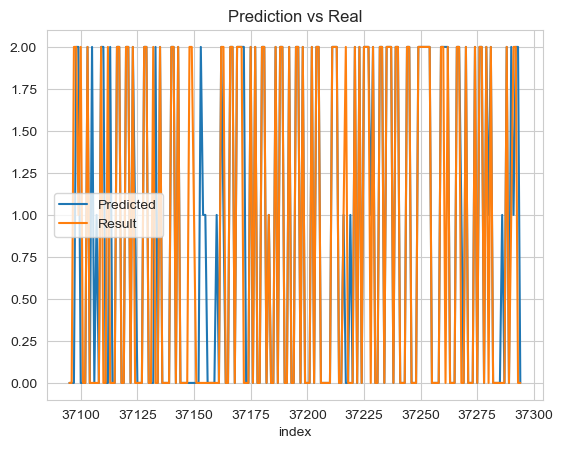

In [180]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(10,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

### 保存模型

In [181]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(mlp, f'./sklearn_mlp_{local_time}.joblib')

['./sklearn_mlp_2025_01_23_23_11_20.joblib']

In [182]:
### 加载模型
# model_name = 'sklearn_mlp_' + local_time + '.joblib'
model_name = './' + 'sklearn_mlp_2025_01_21_22_41_15.joblib'
mlp = load(model_name)

### 3.7 Stacked Classifier ###

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [184]:
from sklearn.ensemble import StackingClassifier
stacked_clf = StackingClassifier(estimators=[('svm', SVC(max_iter=100000)), ('logistic', LogisticRegression(C=0.01, max_iter=10000))],
                                final_estimator=LogisticRegression(max_iter=10000),
                                n_jobs=-1).fit(xTr, yTr.values.ravel())

In [185]:
# training score
accuracy_score(yTr.Result.values, stacked_clf.predict(xTr))

0.7415736014957804

In [186]:
# testing score
accuracy_score(yTe.Result.values, stacked_clf.predict(xTe))

0.7613636363636364

## 4. Result Analysis ##

In [187]:
## TODO: breakdown results across divisions and/or teams; i.e., see how model performs individually at subgroups

## 5. Scrap Code ##

In [188]:
barcelona_df = learning_df[(learning_df['HomeTeam 17'] == 1) | (learning_df['AwayTeam 17'] == 1)]
barcelona_df

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,Div 0,Div 1,Div 2,Div 3,Div 4,HomeTeam 0,HomeTeam 1,HomeTeam 2,HomeTeam 3,HomeTeam 4,HomeTeam 5,HomeTeam 6,HomeTeam 7,HomeTeam 8,HomeTeam 9,HomeTeam 10,HomeTeam 11,HomeTeam 12,HomeTeam 13,HomeTeam 14,HomeTeam 15,HomeTeam 16,HomeTeam 17,HomeTeam 18,HomeTeam 19,HomeTeam 20,HomeTeam 21,HomeTeam 22,HomeTeam 23,HomeTeam 24,HomeTeam 25,HomeTeam 26,HomeTeam 27,HomeTeam 28,HomeTeam 29,HomeTeam 30,HomeTeam 31,HomeTeam 32,HomeTeam 33,HomeTeam 34,HomeTeam 35,HomeTeam 36,HomeTeam 37,HomeTeam 38,HomeTeam 39,HomeTeam 40,HomeTeam 41,HomeTeam 42,HomeTeam 43,HomeTeam 44,HomeTeam 45,HomeTeam 46,HomeTeam 47,HomeTeam 48,HomeTeam 49,HomeTeam 50,HomeTeam 51,HomeTeam 52,HomeTeam 53,HomeTeam 54,HomeTeam 55,HomeTeam 56,HomeTeam 57,HomeTeam 58,HomeTeam 59,HomeTeam 60,HomeTeam 61,HomeTeam 62,HomeTeam 63,HomeTeam 64,HomeTeam 65,HomeTeam 66,HomeTeam 67,HomeTeam 68,HomeTeam 69,HomeTeam 70,HomeTeam 71,HomeTeam 72,HomeTeam 73,HomeTeam 74,HomeTeam 75,HomeTeam 76,HomeTeam 77,HomeTeam 78,HomeTeam 79,HomeTeam 80,HomeTeam 81,HomeTeam 82,HomeTeam 83,HomeTeam 84,HomeTeam 85,HomeTeam 86,HomeTeam 87,HomeTeam 88,HomeTeam 89,HomeTeam 90,HomeTeam 91,HomeTeam 92,HomeTeam 93,HomeTeam 94,HomeTeam 95,HomeTeam 96,HomeTeam 97,HomeTeam 98,HomeTeam 99,HomeTeam 100,HomeTeam 101,HomeTeam 102,HomeTeam 103,HomeTeam 104,HomeTeam 105,HomeTeam 106,HomeTeam 107,HomeTeam 108,HomeTeam 109,HomeTeam 110,HomeTeam 111,HomeTeam 112,HomeTeam 113,HomeTeam 114,HomeTeam 115,HomeTeam 116,HomeTeam 117,HomeTeam 118,HomeTeam 119,HomeTeam 120,HomeTeam 121,HomeTeam 122,HomeTeam 123,HomeTeam 124,HomeTeam 125,HomeTeam 126,HomeTeam 127,HomeTeam 128,HomeTeam 129,HomeTeam 130,HomeTeam 131,HomeTeam 132,HomeTeam 133,HomeTeam 134,HomeTeam 135,HomeTeam 136,HomeTeam 137,HomeTeam 138,HomeTeam 139,HomeTeam 140,HomeTeam 141,HomeTeam 142,HomeTeam 143,HomeTeam 144,HomeTeam 145,HomeTeam 146,HomeTeam 147,HomeTeam 148,HomeTeam 149,HomeTeam 150,HomeTeam 151,HomeTeam 152,HomeTeam 153,HomeTeam 154,HomeTeam 155,HomeTeam 156,HomeTeam 157,HomeTeam 158,HomeTeam 159,HomeTeam 160,HomeTeam 161,HomeTeam 162,HomeTeam 163,HomeTeam 164,HomeTeam 165,HomeTeam 166,HomeTeam 167,HomeTeam 168,HomeTeam 169,HomeTeam 170,HomeTeam 171,HomeTeam 172,HomeTeam 173,HomeTeam 174,HomeTeam 175,HomeTeam 176,HomeTeam 177,HomeTeam 178,HomeTeam 179,HomeTeam 180,HomeTeam 181,HomeTeam 182,HomeTeam 183,HomeTeam 184,HomeTeam 185,HomeTeam 186,HomeTeam 187,HomeTeam 188,HomeTeam 189,HomeTeam 190,HomeTeam 191,HomeTeam 192,HomeTeam 193,HomeTeam 194,HomeTeam 195,HomeTeam 196,HomeTeam 197,HomeTeam 198,HomeTeam 199,HomeTeam 200,HomeTeam 201,HomeTeam 202,HomeTeam 203,HomeTeam 204,HomeTeam 205,HomeTeam 206,AwayTeam 0,AwayTeam 1,AwayTeam 2,AwayTeam 3,AwayTeam 4,AwayTeam 5,AwayTeam 6,AwayTeam 7,AwayTeam 8,AwayTeam 9,AwayTeam 10,AwayTeam 11,AwayTeam 12,AwayTeam 13,AwayTeam 14,AwayTeam 15,AwayTeam 16,AwayTeam 17,AwayTeam 18,AwayTeam 19,AwayTeam 20,AwayTeam 21,AwayTeam 22,AwayTeam 23,AwayTeam 24,AwayTeam 25,AwayTeam 26,AwayTeam 27,AwayTeam 28,AwayTeam 29,AwayTeam 30,AwayTeam 31,AwayTeam 32,AwayTeam 33,AwayTeam 34,AwayTeam 35,AwayTeam 36,AwayTeam 37,AwayTeam 38,AwayTeam 39,AwayTeam 40,AwayTeam 41,AwayTeam 42,AwayTeam 43,AwayTeam 44,AwayTeam 45,AwayTeam 46,AwayTeam 47,AwayTeam 48,AwayTeam 49,AwayTeam 50,AwayTeam 51,AwayTeam 52,AwayTeam 53,AwayTeam 54,AwayTeam 55,AwayTeam 56,AwayTeam 57,AwayTeam 58,AwayTeam 59,AwayTeam 60,AwayTeam 61,AwayTeam 62,AwayTeam 63,AwayTeam 64,AwayTeam 65,AwayTeam 66,AwayTeam 67,AwayTeam 68,AwayTeam 69,AwayTeam 70,AwayTeam 71,AwayTeam 72,AwayTeam 73,AwayTeam 74,AwayTeam 75,AwayTeam 76,AwayTeam 77,AwayTeam 78,AwayTeam 79,AwayTeam 80,AwayTeam 81,AwayTeam 82,AwayTeam 83,AwayTeam 84,AwayTeam 85,AwayTeam 86,AwayTeam 87,AwayTeam 88,AwayTeam 89,AwayTeam 90,AwayTeam 91,AwayTeam 92,AwayTeam 93,AwayTeam 94,AwayTeam 95,AwayTeam 96,AwayTeam 97,AwayTeam 98,AwayTeam 99,AwayTeam 100,AwayTeam 101,AwayTeam 102,AwayTeam 103,AwayTeam 104,AwayTeam 105,AwayTeam 106,AwayTeam 107,AwayTeam 108,AwayTeam 109,AwayTe

In [189]:
bxTr = xTr[(xTr['HomeTeam 17'] == 1) | (xTr['AwayTeam 17'] == 1)]
bxTe = xTe[(xTe['HomeTeam 17'] == 1) | (xTe['AwayTeam 17'] == 1)]

In [190]:
byTr, byTe = yTr.loc[bxTr.index,:], yTe.loc[bxTe.index,:]

In [191]:
# training score
accuracy_score(byTr, l1_lr.predict(bxTr))

0.6738609112709832

In [192]:
# testing score
accuracy_score(byTe, l1_lr.predict(bxTe))

0.8

In [193]:
# training score
accuracy_score(byTr, l2_lr.predict(bxTr))

0.6786570743405276

In [194]:
# testing score
accuracy_score(byTe, l2_lr.predict(bxTe))

0.775

## 6. Pytorch MLP ##

In [195]:
type(xTr)

pandas.core.frame.DataFrame

In [196]:
xTr.shape

(19789, 437)

In [197]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [198]:
class Attention(nn.Module):
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Parameter(torch.randn(feature_dim))

    def forward(self, x):
        # 应用注意力权重
        weights = F.softmax(self.attention_weights, dim=0)
        # 加权求和
        x = x * weights
        return x
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=xTr.shape[1], out_features=512)
        self.bn1 = nn.BatchNorm1d(num_features=512)
        self.attention = Attention(512)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.bn2 = nn.BatchNorm1d(num_features=128)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(in_features=128, out_features=32)
        self.bn3 = nn.BatchNorm1d(num_features=32)
        self.dropout3 = nn.Dropout(p=0.2)
        
        self.fc4 = nn.Linear(in_features=32, out_features=3)  # 输出层改为3，对应三个类别

    def forward(self, x):
        x = self.dropout1(torch.relu(self.bn1(self.fc1(x))))
        x = self.attention(x)
        x = self.dropout2(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout3(torch.relu(self.bn3(self.fc3(x))))
        x = self.fc4(x)
        return x

# 数据预处理
scaler = StandardScaler()
xTr_scaled = scaler.fit_transform(xTr)
xTr_tensor = torch.tensor(xTr_scaled, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
dataset = TensorDataset(xTr_tensor, yTr_tensor)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True)

# 创建模型实例
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 假设训练200个epoch
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 清除之前的梯度

        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数

        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

Epoch 1, Loss: 1.2961, Accuracy: 16.84%
Epoch 2, Loss: 1.2507, Accuracy: 18.97%
Epoch 3, Loss: 1.2119, Accuracy: 21.71%
Epoch 4, Loss: 1.1782, Accuracy: 25.63%
Epoch 5, Loss: 1.1474, Accuracy: 29.19%
Epoch 6, Loss: 1.1083, Accuracy: 34.66%
Epoch 7, Loss: 1.0761, Accuracy: 39.25%
Epoch 8, Loss: 1.0410, Accuracy: 44.30%
Epoch 9, Loss: 1.0092, Accuracy: 48.71%
Epoch 10, Loss: 0.9814, Accuracy: 51.96%
Epoch 11, Loss: 0.9542, Accuracy: 55.18%
Epoch 12, Loss: 0.9263, Accuracy: 58.47%
Epoch 13, Loss: 0.9025, Accuracy: 60.23%
Epoch 14, Loss: 0.8826, Accuracy: 62.33%
Epoch 15, Loss: 0.8660, Accuracy: 63.87%
Epoch 16, Loss: 0.8471, Accuracy: 65.50%
Epoch 17, Loss: 0.8292, Accuracy: 66.57%
Epoch 18, Loss: 0.8129, Accuracy: 68.11%
Epoch 19, Loss: 0.7972, Accuracy: 69.35%
Epoch 20, Loss: 0.7856, Accuracy: 69.83%
Epoch 21, Loss: 0.7714, Accuracy: 70.67%
Epoch 22, Loss: 0.7586, Accuracy: 71.81%
Epoch 23, Loss: 0.7473, Accuracy: 71.55%
Epoch 24, Loss: 0.7331, Accuracy: 72.67%
Epoch 25, Loss: 0.7284, A

In [199]:
# 假设 xTe 和 yTe 是 pandas DataFrame 或 Series
# 数据预处理
xTe_scaled = scaler.fit_transform(xTe)  # 使用与训练数据相同的标准化参数
xTe_tensor = torch.tensor(xTe_scaled, dtype=torch.float32).to(device)
yTe_tensor = torch.tensor(yTe.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 69.53%


## 7. Pytorch Transformer ##

In [200]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.model_dim = input_dim  # 通常情况下，模型维度与输入维度相同

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.model_dim,
            nhead=num_heads,
            dim_feedforward=512,  # 前馈网络的维度
            dropout=dropout,
            batch_first=True
        )

        # Transformer Encoder
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # 输出层
        self.output_layer = nn.Linear(self.model_dim, self.num_classes)

        # Batch Normalization
        self.bn = nn.BatchNorm1d(self.model_dim)

    def forward(self, x):
        # 增加一个假的序列维度
        x = x.unsqueeze(1)
        # Transformer Encoder
        x = self.transformer_encoder(x)

        # Batch Normalization
        x = self.bn(x[:, 0, :])  # 取序列的第一个元素进行批量归一化

        # 输出层
        x = self.output_layer(x)
        return x

# 补充维度
n_samples_xTr = xTr.shape[0]
n_samples_xTe = xTe.shape[0]
for i in range(1, 4):  # 从 1 到 3，因为需要添加三列
    xTr[f'pad{i}'] = 0  # 添加填充列，初始化为 0
    xTe[f'pad{i}'] = 0  # 添加填充列，初始化为 0

# 参数设置
input_dim = xTr.shape[1]  # 输入特征的维度
num_classes = 3  # 类别数
num_heads = 10  # 注意力头的数量
num_layers = 3  # Transformer层的数量
dropout = 0.8  # Dropout比率

# 创建模型
model = TransformerModel(input_dim, num_classes, num_heads, num_layers, dropout).to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 数据加载
# 假设 xTr 和 xTe 已经是适当的 torch.Tensor 对象
xTr_values = xTr.values.astype(float)
xTe_values = xTe.values.astype(float)

xTr_tensor = torch.tensor(xTr_values, dtype=torch.float32).to(device)
xTe_tensor = torch.tensor(xTe_values, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values, dtype=torch.long).to(device).squeeze(1)
yTe_tensor = torch.tensor(yTe.values, dtype=torch.long).to(device).squeeze(1)
# 转换为 one-hot 编码
yTr_tensor = F.one_hot(yTr_tensor, num_classes=num_classes).float()
yTe_tensor = F.one_hot(yTe_tensor, num_classes=num_classes).float()

# 数据加载器
train_dataset = TensorDataset(xTr_tensor, yTr_tensor)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=False)

test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 运行更多的 epoch 以获得更好的结果
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        _, truth = torch.max(labels.data, 1)
        total += truth.size(0)
        correct += (predicted == truth).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, truth = torch.max(labels.data, 1)
        total += labels.size(0)
        correct += (predicted == truth).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

D:\Anaconda3\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1, Loss: 1.1736, Accuracy: 35.11%
Epoch 2, Loss: 1.1445, Accuracy: 37.14%
Epoch 3, Loss: 1.1207, Accuracy: 38.48%
Epoch 4, Loss: 1.0985, Accuracy: 40.28%
Epoch 5, Loss: 1.0808, Accuracy: 42.60%
Epoch 6, Loss: 1.0602, Accuracy: 44.92%
Epoch 7, Loss: 1.0380, Accuracy: 47.21%
Epoch 8, Loss: 1.0115, Accuracy: 50.09%
Epoch 9, Loss: 0.9787, Accuracy: 54.66%
Epoch 10, Loss: 0.9445, Accuracy: 57.73%
Epoch 11, Loss: 0.9032, Accuracy: 61.33%
Epoch 12, Loss: 0.8760, Accuracy: 63.55%
Epoch 13, Loss: 0.8610, Accuracy: 64.42%
Epoch 14, Loss: 0.8387, Accuracy: 66.11%
Epoch 15, Loss: 0.8189, Accuracy: 67.17%
Epoch 16, Loss: 0.8102, Accuracy: 67.32%
Epoch 17, Loss: 0.7972, Accuracy: 67.93%
Epoch 18, Loss: 0.7881, Accuracy: 68.42%
Epoch 19, Loss: 0.7789, Accuracy: 68.70%
Epoch 20, Loss: 0.7747, Accuracy: 68.69%
Epoch 21, Loss: 0.7595, Accuracy: 69.48%
Epoch 22, Loss: 0.7575, Accuracy: 69.46%
Epoch 23, Loss: 0.7520, Accuracy: 69.34%
Epoch 24, Loss: 0.7437, Accuracy: 69.66%
Epoch 25, Loss: 0.7471, A